In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

In [3]:
# 붓꽃 데이터

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [4]:
# 시각화를 위한 PCA

pca = PCA(n_components=2).fit(x)
x_reduced = pca.transform(x)

In [5]:
data = np.hstack((x_reduced, y.reshape(-1, 1)))

In [6]:
np.random.seed(12)
labeled_data_indices = np.random.randint(0, len(data), size = 9)
labeled_data = data[labeled_data_indices]
unlabeled_data = data[list(set(np.arange(len(data))) - set(labeled_data_indices))]

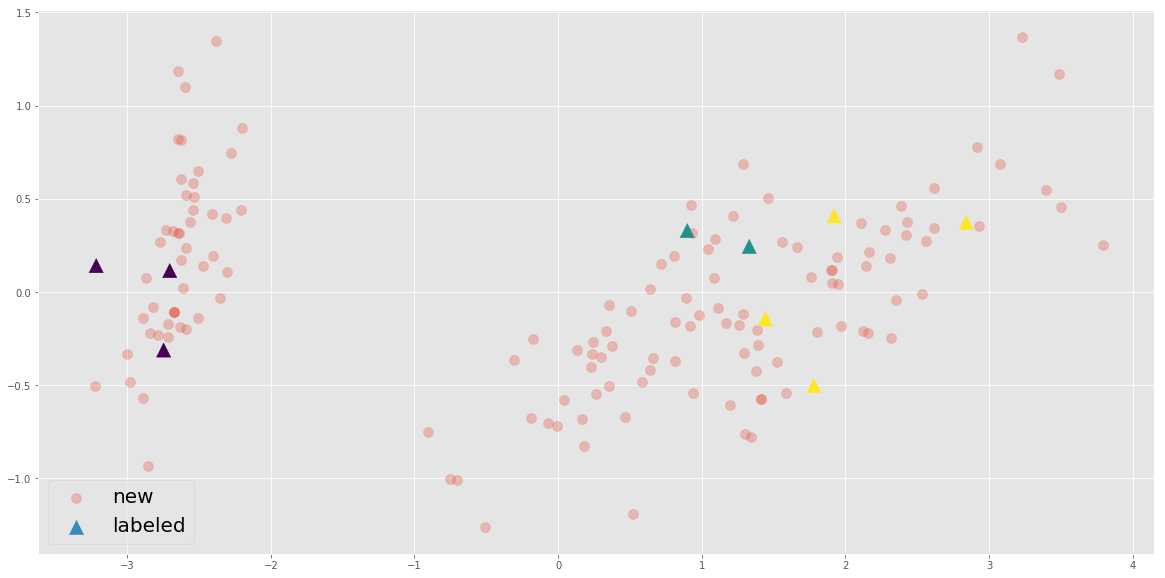

In [7]:
plt.figure(figsize = (20, 10))
plt.scatter(unlabeled_data[:, 0], unlabeled_data[:, 1], marker='o', s = 100, alpha = 0.3, label = 'new')
plt.scatter(labeled_data[:, 0], labeled_data[:, 1], c = labeled_data[:, 2], marker = '^', s = 200, label = 'labeled')
plt.legend(fontsize = 20)

# K - NN
- 가장 가까운 k 개 선택
- 분류모델에 적용

## 1.  거리
- 유클리디안 거리 적용

In [9]:
def distance(u, v):
    from scipy import spatial
    return spatial.distance.euclidean(u, v)

## 2. k 개 선택

In [10]:
def majority_vote(labels):
    from collections import Counter
    """공동 1등이 생길 경우, 단독 1등이 생길 때까지 k를 하나씩 줄인다."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])

## 3. 모델 구현

In [11]:
def knn_classify(k, labeled_points, new_point):
    by_distance = np.array(sorted(labeled_points, key = lambda data : distance(data[:2], new_point)))
    k_nearest_labels = by_distance[:k, -1]
    return majority_vote(k_nearest_labels)

## 4. 모델 실행

In [12]:
def run(k, unlabeled_data):
    """새로운 데이터셋이 들어왔을 때 각 데이터마다 라벨 분류"""
    predicted_unlabeled_data = np.array([])
    for _, row in enumerate(unlabeled_data):
        predicted = knn_classify(k, labeled_data, row[:2])
        predicted_unlabeled_data = np.append(predicted_unlabeled_data, predicted)
    return predicted_unlabeled_data

In [13]:
predicted_unlabeled_data = run(3, unlabeled_data)

## 5. 시각화

In [14]:
## 잘못 예측된 데이터

incorrect_predicted = unlabeled_data[predicted_unlabeled_data != unlabeled_data[:, 2]]

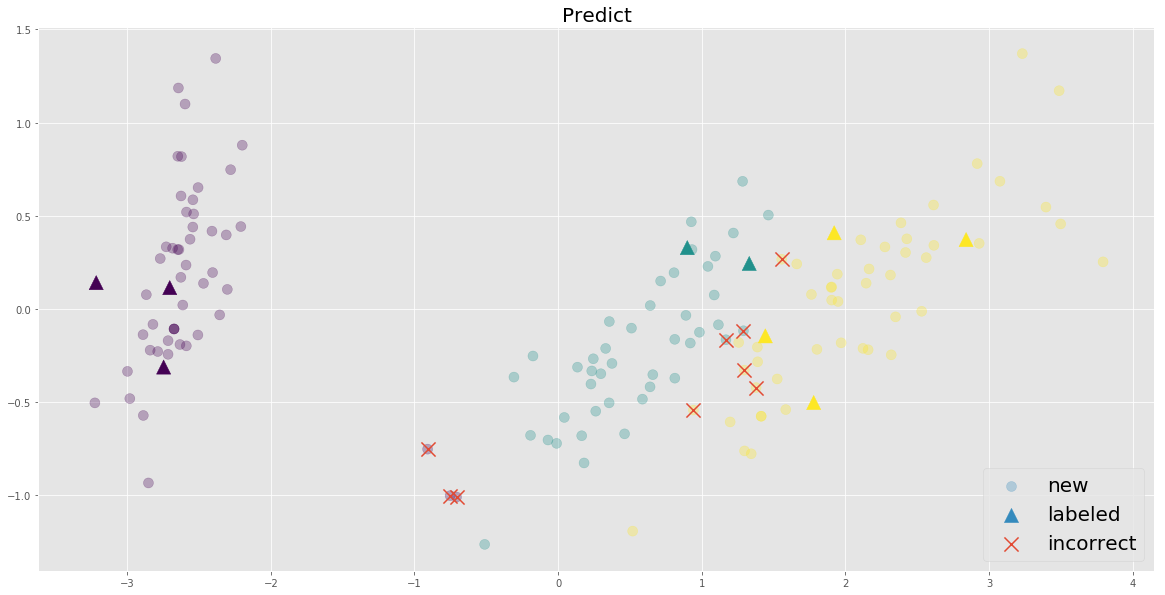

In [15]:
plt.figure(figsize = (20, 10))
plt.title('Predict', size = 20)
plt.scatter(unlabeled_data[:, 0], unlabeled_data[:, 1], c = predicted_unlabeled_data, marker='o', s = 100, alpha = 0.3, label = 'new')
plt.scatter(labeled_data[:, 0], labeled_data[:, 1], c = labeled_data[:, 2], marker = '^', s = 200, label = 'labeled')
plt.scatter(incorrect_predicted[:, 0], incorrect_predicted[:, 1], 
            marker='x', s = 200, label = 'incorrect')
plt.legend(fontsize = 20);

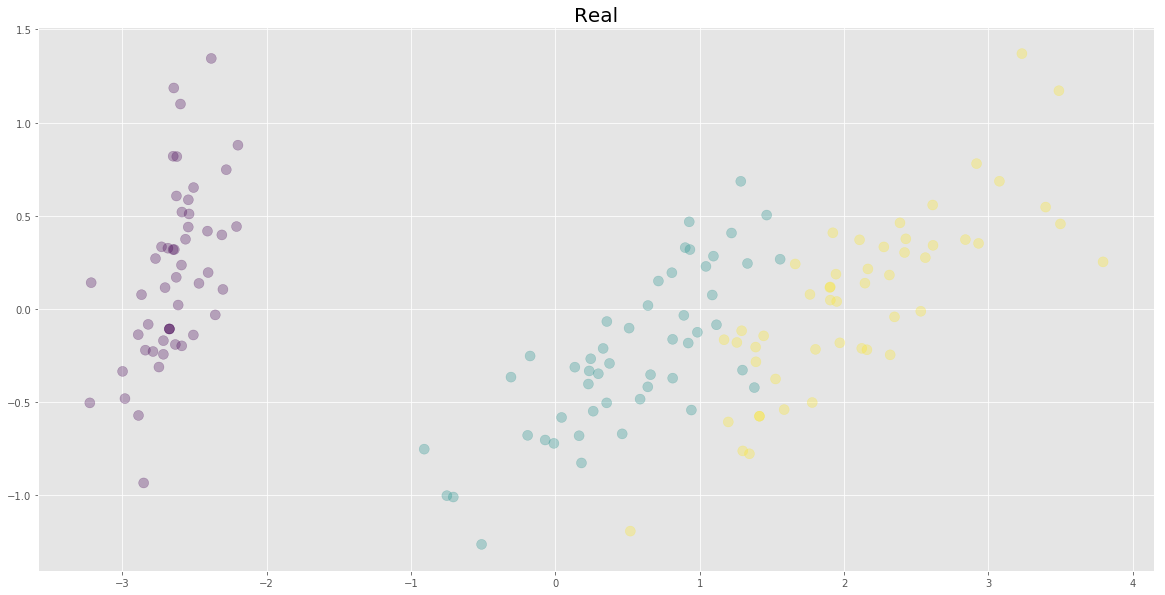

In [16]:
plt.figure(figsize = (20, 10))
plt.title('Real', size = 20)
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c = y, marker='o', s = 100, alpha = 0.3);